# ECON 514 Assignment 2
## Shaoyi Yu
### Q1

In [1]:
#set up variables
using SymPy, Plots
pi, rho_1, rho_2 , beta= symbols("pi,rho_1, rho_2, beta", real = true, positive = true)

(pi, rho_1, rho_2, beta)

In [2]:
#solve mixed strategies for R2
r1 = solve(rho_1/2 + (1 - rho_1) - beta*rho_1 - beta*(1-rho_1)/2, rho_1)[1]

2 - beta
--------
beta + 1

In [3]:
#solve mixed strategies for R1
r2 = solve(beta*rho_2/2 + (1-beta)*rho_2 + (1-rho_2) - beta*rho_2 - beta*(1-rho_2)*beta/2 - (1-beta)*(1-rho_2)*beta, rho_2)[1]

    2             
beta  - 2*beta + 2
------------------
 beta*(beta + 1)  

In [4]:
#solve for symmetric computers
c = solve(pi/2*(r1 + (1-r1)*beta) + (1-pi)*(r1*r2*beta/2 + r1*r2*(1-beta) + (1-r1)*r2*beta + (1-r1)*(1-r2)*beta*beta/2 + (1-r1)*(1-r2)*(1-beta)*beta) - beta*pi*(r1*r2/2 + 
r1*(1-r2)*beta + (1-r1)*r2 + (1-r1)*(1-r2)*beta/2) - (1-pi)*beta/2*(r2 + (1-r2)*beta), pi)[1]

       4         3          2                
 5*beta  - 3*beta  - 12*beta  + 18*beta - 8  
---------------------------------------------
  /      4         3         2              \
2*\2*beta  - 3*beta  - 6*beta  + 10*beta - 4/

In [5]:
#solve for expected get-thru
exp = pi^2 * (r1 + (1-r1)*beta) + 2*pi*(1-pi)*(1+beta*r2+beta^2*(1-r2)) + (1-pi)^2 *beta^2


                                                                         /     >
    2         2     2 /     /  2 - beta    \   2 - beta\                 |     >
beta *(1 - pi)  + pi *|beta*|- -------- + 1| + --------| + 2*pi*(1 - pi)*|beta >
                      \     \  beta + 1    /   beta + 1/                 \     >

>   /        2             \           2             \
> 2 |    beta  - 2*beta + 2|       beta  - 2*beta + 2|
>  *|1 - ------------------| + 1 + ------------------|
>   \     beta*(beta + 1)  /            beta + 1     /

In [6]:
d = diff(exp,pi)

                                                                  /      /     >
    2                   /     /  2 - beta    \   2 - beta\        |    2 |     >
beta *(2*pi - 2) + 2*pi*|beta*|- -------- + 1| + --------| - 2*pi*|beta *|1 -  >
                        \     \  beta + 1    /   beta + 1/        \      \     >

>     2             \           2             \              /      /        2 >
> beta  - 2*beta + 2|       beta  - 2*beta + 2|              |    2 |    beta  >
> ------------------| + 1 + ------------------| + 2*(1 - pi)*|beta *|1 - ----- >
>  beta*(beta + 1)  /            beta + 1     /              \      \     beta >

>              \           2             \
>  - 2*beta + 2|       beta  - 2*beta + 2|
> -------------| + 1 + ------------------|
> *(beta + 1)  /            beta + 1     /

In [7]:
best_regulated = solve(d,pi)[1]

    3         2             
beta  - 3*beta  + 3*beta - 3
----------------------------
    3         2             
beta  - 5*beta  + 4*beta - 4

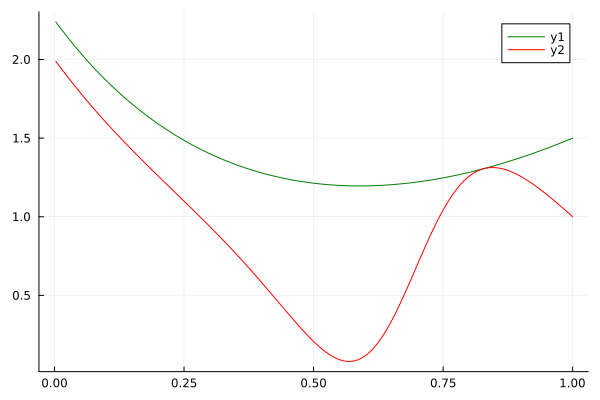

In [8]:
plot(exp(pi => best_regulated),color="green",0,1)
plot!(exp(pi => c),color="red", 0, 1)

In [9]:
#from the plot we can see that the maximum difference is around 0.57

exp(pi => c(beta => 0.57), beta => 0.57)/exp(pi => best_regulated(beta => 0.57), beta => 0.57)


0.0668206691481378

### Q2

In [10]:
using Pkg
Pkg.add("Chain")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Statistics")
using DataFrames, CSV, Statistics, Chain
using Distributions,Optim, Plots
dataset = CSV.read("datamerged2.csv", DataFrame);

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [10745b16] + Statistics v1.10.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


ArgumentError: ArgumentError: Package DataFrames not found in current path.
- Run `import Pkg; Pkg.add("DataFrames")` to install the DataFrames package.

In [ ]:
Pkg.update()

    Updating registry at `~/.julia/registries/General.toml`
   Installed ConcurrentUtilities ─────── v2.5.0
   Installed GR_jll ──────────────────── v0.73.13+0
   Installed RecursiveArrayTools ─────── v2.38.10
   Installed StaticArrays ────────────── v1.9.12
   Installed Quadrature ──────────────── v2.1.0
   Installed GPUArrays ───────────────── v9.1.0
   Installed ColorSchemes ────────────── v3.29.0
   Installed Pango_jll ───────────────── v1.56.1+0
   Installed IrrationalConstants ─────── v0.2.4
   Installed ADTypes ─────────────────── v0.2.7
   Installed FiniteDiff ──────────────── v2.27.0
   Installed SciMLBase ───────────────── v1.98.1
   Installed GR ──────────────────────── v0.73.13
   Installed LLVM ────────────────────── v6.6.3
   Installed CodecZlib ───────────────── v0.7.8
   Installed Zstd_jll ────────────────── v1.5.7+1
   Installed Bzip2_jll ───────────────── v1.0.9+0
   Installed XZ_jll ──────────────────── v5.6.4+1
   Installed libpng_jll ──────────────── v1.6.46+0
   I

In [ ]:
r0 = filter( row -> row.round == 2 && row.treatment ==1, dataset);
subset = groupby(r0, :id);
offs = combine(subset, :value => mean);
offers = @chain offs begin
    _.value_mean
end;
r1 = filter( row -> row.resp == 1, r0);
r = groupby(r1, :tofrom);
resp = combine(r, :value => minimum);
responses = @chain resp begin
   _.value_minimum
end;

In [ ]:
#T = Normal(2,3)
G = truncated(Normal(20,10),1,Inf)
#initialize
mu = 20 # mean for the distribution
sigma = 10 #variance
r = 2
K = 55
R = .5*K
alpha = 1/10

In [ ]:
p = [mu, sigma, r, alpha]
p[4]


In [ ]:
function Q(s, r, G,K)
    if s >= K/2
        return 1
    elseif s <= 0
        return 0
    elseif r <= 0
        return 0
    elseif s >= r
        return 1 - cdf(G, (r-s+K/2)/r)
    else
        return 1- cdf(G, K/(2*s))
    end
end


In [ ]:
function dQ(s, r, G, K)
    if s >= K/2
      return 0
  elseif s <= 0
      return 0
  elseif r <= 0
      return 0
  elseif s >= r
      return  pdf(G, (r-s+K/2)/r)*1/r
  else
      return pdf(G, K/(2*s))*K/(2*s^2)
  end
end


In [ ]:
function type(s, r, G, alpha, K,R)
    return max(1,Q(s,r,G,K)*(1+2*alpha)/(R*dQ(s,r,G,K)) -(K/R)*(1+alpha)+ 1 + s*(1+2*alpha)/R)
end


In [ ]:
function likelihood(p, offers, responses,K,R)
    G = truncated(Normal(p[1],p[2]),1, Inf)
    l = 0
    for o in offers
        if o <= p[3]
            v = at_r(p[3],G,p[4],K,R)
            if v > 0
                l += log(v)
            else 
                l += log(.01)
            end
        else
            v = pdf(G,type(o,p[3],G,p[4],K,R))
            if v > 0
                l += log(v)
            else
                l += log(.01)
            end
        end
    end
    for k in responses
        l += log(1 - cdf(G, (p[3]-k+K/2)/p[3])+.01)
    end
    return -l
end
            

In [ ]:
likelihood(p, offers,responses,K,R)

In [ ]:
lower = [0,0,1.5,0]
upper = [Inf, Inf,20,1]
initial = [mu,sigma,2,.1]

In [ ]:
res = optimize(params -> likelihood(params, offers, responses,K,R), lower, upper, initial, Fminbox())

In [ ]:
result = Optim.minimizer(res)

In [ ]:
likelihood(result, offers,responses,K,R)

In [ ]:
mean(truncated(Normal(result[1],result[2]),1,Inf))

In [ ]:
F = truncated(Normal(result[1],result[2]),1,Inf)
plot(x -> pdf(F,x), 1, 10)

#### 